<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Damped_sine_LSTM_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt


In [2]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
  return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [3]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
  X, y = list(), list()
  for _ in range(n_patterns):
    p = randint(10, 20)
    d = uniform(0.01, 0.1)
    sequence = generate_sequence(length + output, p, d)
    X.append(sequence[:-output])
    y.append(sequence[-output:])
  X = array(X).reshape(n_patterns, length, 1)
  y = array(y).reshape(n_patterns, output)
  return X, y

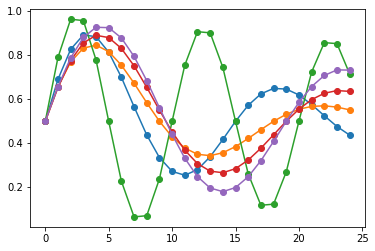

In [4]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
  plt.plot([x for x in X[i, :, 0]] + [x for x in y[i]],'-o')
plt.show()

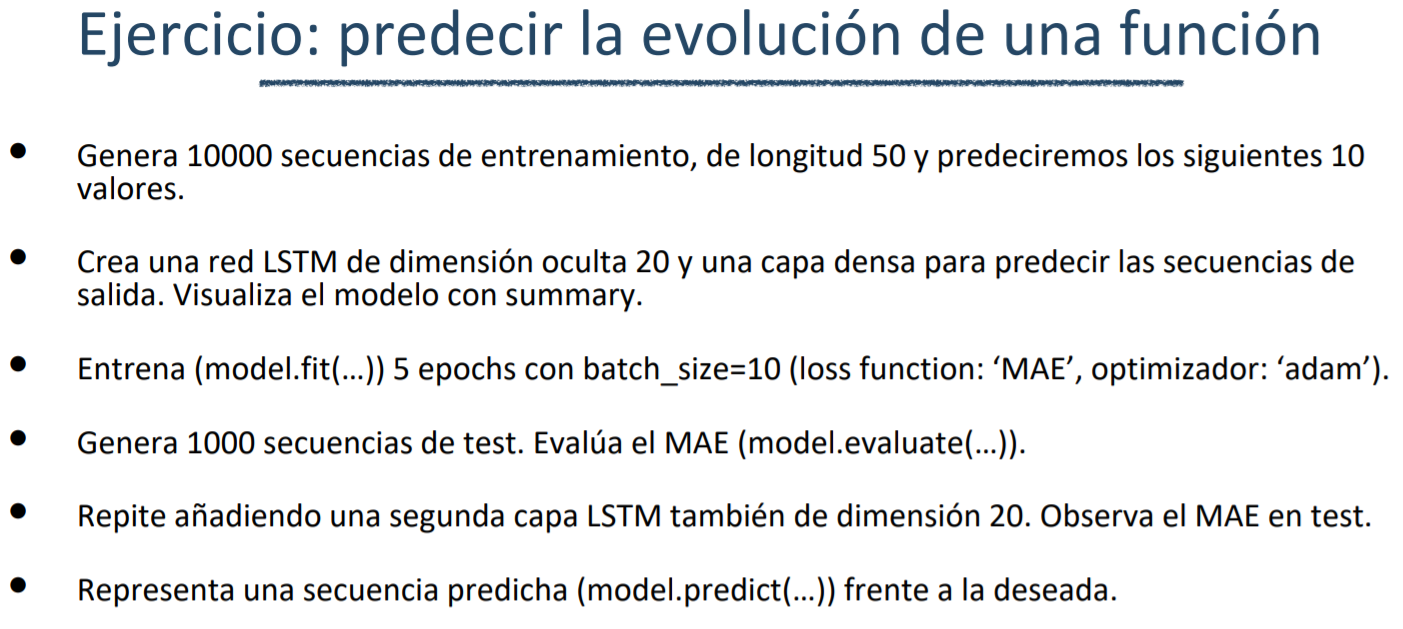

In [6]:
#configure problem
lenght = 50
output = 10 #valores a predecir

In [7]:
#define model
model = Sequential()
### COMENTAR UNA OPCIÓN
#una capa LSTM
#model.add(LSTM(20, input_shape=(lenght, 1)))

#dos capas
model.add(LSTM(20, return_sequences=True, input_shape=(lenght, 1))) #
#return_sequences=True --> para poder tener retorno de secuencua para la siguiente capa
model.add(LSTM(20))

model.add(Dense(output))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 20)            1760      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
Total params: 5,250
Trainable params: 5,250
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
X, y = generate_examples(lenght, 10000, output)
history = model.fit(X, y, batch_size=10, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 24s 21ms/step - loss: 0.0442
Epoch 2/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0247
Epoch 3/10
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0176
Epoch 4/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0126
Epoch 5/10
1000/1000 [==============================] - 26s 26ms/step - loss: 0.0103
Epoch 6/10
1000/1000 [==============================] - 33s 33ms/step - loss: 0.0088
Epoch 7/10
1000/1000 [==============================] - 24s 24ms/step - loss: 0.0072
Epoch 8/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0060
Epoch 9/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0050
Epoch 10/10
1000/1000 [==============================] - 21s 21ms/step - loss: 0.0043


In [9]:
X, y = generate_examples(lenght, 10000, output)
loss = model.evaluate(X, y, verbose=0)
print( 'MAE:   ', loss)

MAE:    0.0036750396247953176


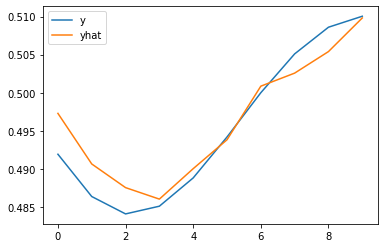

In [11]:
X, y = generate_examples(lenght, 1, output)
yhat = model.predict(X, verbose=0) #predicción de y
pyplot.plot(y[0], label='y')
pyplot.plot(yhat[0], label = 'yhat')
pyplot.legend()
pyplot.show()